C:\Users\0\AppData\Local\Temp\ipykernel_6860\2940917870.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


Epoch: 0 loss: 1.1665303707122803
Epoch: 10 loss: 1.065513014793396
Epoch: 20 loss: 0.9795875549316406
Epoch: 30 loss: 0.8567531704902649
Epoch: 40 loss: 0.7511081695556641
Epoch: 50 loss: 0.6734958291053772
Epoch: 60 loss: 0.5836897492408752
Epoch: 70 loss: 0.4735749661922455
Epoch: 80 loss: 0.3567352592945099
Epoch: 90 loss: 0.1960953325033188


Text(0.5, 0, 'Epoch')

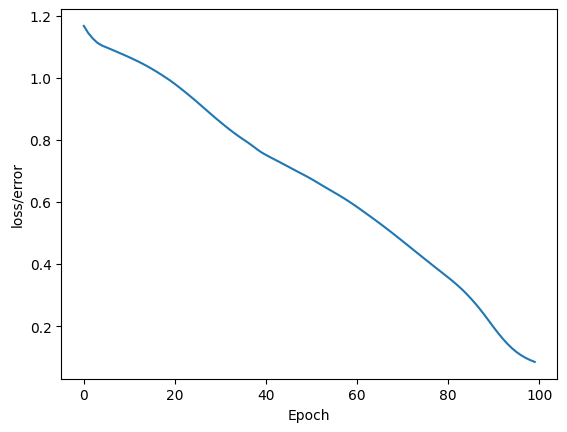

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # initates nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x 

######################################### PREPARE DATA ################################################################

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

x = my_df.drop('variety', axis=1) # we need to drop the last column named variety because that will be our y
y = my_df['variety']

# TURN FORM DATAFRAM TO NUMPY ARRAYS
X = x.values
Y = y.values

#########################################################################################################################

# USE DATA
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train =  torch.LongTensor(y_train)
y_test =  torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()

# TRAIN MODEL
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# GRAPH!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")
